<a href="https://colab.research.google.com/github/zombe962/TensorFlow_study/blob/main/tensorflow_Tensor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TensorFlow 학습 - 텐서

2022.02.28

https://www.tensorflow.org/guide/tensor

In [2]:
import tensorflow as tf 
import numpy as np

텐서는 일관된 유형(dtype)을 가진 다차원 배열이다.

일종의 Numpy의 np.arrays와 텐서와 같다고 생각할 수 있다.

모든 텐서의 내용은 업데이트할 수 없으며, 새로운 텐서를 만들 수만 있음

# 기초(Basics)



In [3]:
rank_0_tensor = tf.constant(4)                # 'scalar' or 'rank-0' tensor
rank_1_tensor = tf.constant([2.0, 3.0, 4.0])  # 'vector' or 'rank-1' tensor
rank_2_tensor = tf.constant([[1, 2],          # 'matrix' or 'rank-2' tensor
                             [3, 4],
                             [5, 6],], dtype=tf.float16)  # set dtype
print(rank_0_tensor)
print(rank_1_tensor)
print(rank_2_tensor)

tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor([2. 3. 4.], shape=(3,), dtype=float32)
tf.Tensor(
[[1. 2.]
 [3. 4.]
 [5. 6.]], shape=(3, 2), dtype=float16)


In [4]:
# There can be an arbitrary number of axes (sometimes called "dimensions")
rank_3_tensor = tf.constant([
  [[0, 1, 2, 3, 4],
   [5, 6, 7, 8, 9]],
  [[10, 11, 12, 13, 14],
   [15, 16, 17, 18, 19]],
  [[20, 21, 22, 23, 24],
   [25, 26, 27, 28, 29]],])
print(rank_3_tensor)

tf.Tensor(
[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]]

 [[10 11 12 13 14]
  [15 16 17 18 19]]

 [[20 21 22 23 24]
  [25 26 27 28 29]]], shape=(3, 2, 5), dtype=int32)


We can transform Tensor to NumPy Array using 'np.array' or 'tensor.numpy' method

In [5]:
print(np.array(rank_2_tensor))
print(type(np.array(rank_2_tensor)))

[[1. 2.]
 [3. 4.]
 [5. 6.]]
<class 'numpy.ndarray'>


In [6]:
print(rank_2_tensor.numpy())
print(type(rank_2_tensor.numpy()))

[[1. 2.]
 [3. 4.]
 [5. 6.]]
<class 'numpy.ndarray'>


텐서에는 '복소수'와 '문자열'와 같은 유형도 있다.


기본 tf.Tensor 클래스에서는 텐서가 "직사각형"이어야한다. 하지만, 비정형(RaggedTensor) 또는 희소(SparseTensor)가 사용됌

## 기본 산술

In [7]:
a = tf.constant([[1, 2],
                 [3, 4]])
b = tf.constant([[1, 1],
                 [1, 1]]) # or 'tf.ones([2,2])'

print(tf.add(a, b), "\n")        
print(tf.multiply(a, b), "\n")
print(tf.matmul(a, b), "\n")
print("\n\n\n")


print(a + b, "\n")
print(a * b, "\n")
print(a @ b, "\n")

tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[3 3]
 [7 7]], shape=(2, 2), dtype=int32) 





tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[3 3]
 [7 7]], shape=(2, 2), dtype=int32) 



In [8]:
c = tf.constant([[4.0, 5.0], [10.0, 1.0]])

# Find the largest value
print(tf.reduce_max(c))
# Find the index of the largest value
print(tf.argmax(c))
# Compute the softmax
print(tf.nn.softmax(c))

tf.Tensor(10.0, shape=(), dtype=float32)
tf.Tensor([1 0], shape=(2,), dtype=int64)
tf.Tensor(
[[2.6894143e-01 7.3105860e-01]
 [9.9987662e-01 1.2339458e-04]], shape=(2, 2), dtype=float32)


# 형상 정보(About shapes)
텐서는 shapes가 있다.
용어

*   **Shape** : 텐서의 각 차원의 길이(요소의 수)
*   **Rank** : 텐서 축의 수, 스칼라는 rank 0, 벡터는 rank 1, 행렬은 rank 2
*   **Axis** 또는 **Dimension** : 텐서의 특정 차원
*   **Size** : 텐서의 총 항목 수, shape vector의 내적




In [9]:
rank_4_tensor = tf.zeros([3, 2, 4, 5])

print("Type of every element:", rank_4_tensor.dtype)
print("Number of axes:", rank_4_tensor.ndim)
print("Shape of tensor:", rank_4_tensor.shape)
print("Elements along axis 0 of tensor:", rank_4_tensor.shape[0])
print("Elements along the last axis of tensor:", rank_4_tensor.shape[-1])
print("Total number of elements (3*2*4*5):", tf.size(rank_4_tensor).numpy())

Type of every element: <dtype: 'float32'>
Number of axes: 4
Shape of tensor: (3, 2, 4, 5)
Elements along axis 0 of tensor: 3
Elements along the last axis of tensor: 5
Total number of elements (3*2*4*5): 120


항상 각 축의 의미를 추적해야한다.

배치 축이 먼저 오고 그 다음에 공간 차원과 각 위치의 특성이 마지막에 온다.

일반적인 축의 순서는 이렇다.

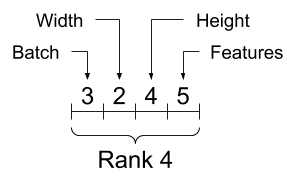

# 인덱싱(indexing)

TensorFlow는 파이썬의 목록 또는 문자열 인덱싱과 마찬가지로 표준 파이썬 인덱싱 규칙과 numpy 인덱싱의 기본 규칙을 따른다.

[tensor slicing guide](https://www.tensorflow.org/guide/tensor_slicing)

# 형상 조작하기(Manipulating Shapes)

텐서의 shape를 바꾸는 것은 매우 유용하다.

In [10]:
# Shape returns a 'TensorShape' object that shows the size on each dimension
var_x = tf.Variable(tf.constant([[1],[2],[3]]))
print(var_x.shape)

(3, 1)


In [12]:
# You can convert this object into a Python list, too
print(var_x.shape.as_list())

[3, 1]


In [16]:
# We can reshape a tensor to a new shape.
# Note that we're passing in a list
reshaped = tf.reshape(var_x, [1, 3])
print(var_x.shape)
print(reshaped.shape,"\n")
print(var_x,"\n")
print(reshaped)

(3, 1)
(1, 3) 

<tf.Variable 'Variable:0' shape=(3, 1) dtype=int32, numpy=
array([[1],
       [2],
       [3]], dtype=int32)> 

tf.Tensor([[1 2 3]], shape=(1, 3), dtype=int32)


데이텅릐 레이아웃은 메모리에서 유지되고 요청된 형상이 같은 데이터를 가리키는 새 텐서가 작성된다. 그래서 TensorFlow는 C 스타일 "행 중심" 메모리 순서를 사용한다. 여기에서 가장 오른쪽에 있는 인덱스를 증가시키면 메모리의 단일 단계에 해당한다.

텐서를 평평하게 하면 어떤 순서로 메모리에 배치되어 있는지 확인할 수 있다.

In [17]:
print(rank_3_tensor,"\n\n")

# A '-1' passed in the 'shape' argument says "Whatever fits"
print(tf.reshape(rank_3_tensor, [-1]))

tf.Tensor(
[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]]

 [[10 11 12 13 14]
  [15 16 17 18 19]]

 [[20 21 22 23 24]
  [25 26 27 28 29]]], shape=(3, 2, 5), dtype=int32) 

tf.Tensor(
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29], shape=(30,), dtype=int32)


일반적으로, tf.reshape의 합리적인 용도는 인접한 축을 결합하거나 분할하는  것뿐이다.

rank_3_tensor, 3x2x5 텐서의 경우, 슬라이스가 혼합되지 않으므로 (3x2)x5 또는 3x(2x5)로 재구성하는 것이 합리적이다.

In [18]:
print(tf.reshape(rank_3_tensor, [3*2, 5]), "\n")
print(tf.reshape(rank_3_tensor, [3, -1]))

tf.Tensor(
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]
 [25 26 27 28 29]], shape=(6, 5), dtype=int32) 

tf.Tensor(
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]], shape=(3, 10), dtype=int32)


reshape 전


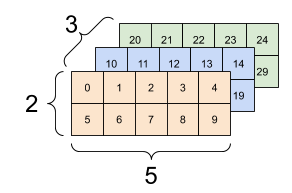


reshpae 후


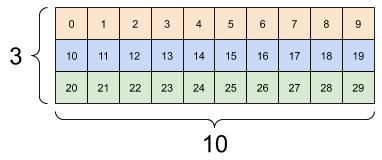

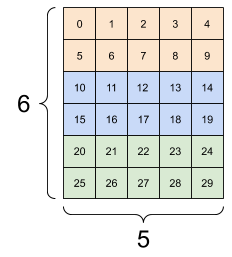

# DTypes에 대한 추가 정보(More on DTypes)

텐서의 dtype을 알기 위해서 tensor.dtype 사용

python 객체에서 텐서를 만들 때 선택적으로 데이터 유형을 지정할 수 있다.

default로 지정된 텐서의 dtype은 정수일 경우 tf.int32, 실수 일 경우 tf.float32로 변환함.  

In [19]:
the_f64_tensor = tf.constant([2.2, 3.3, 4.4], dtype=tf.float64)
the_f16_tensor = tf.cast(the_f64_tensor, dtype=tf.float16)
# Now. let's cast to an uint8 and lose the decimal precision
the_u8_tensor = tf.cast(the_f16_tensor, dtype=tf.uint8)
print(the_u8_tensor)

tf.Tensor([2 3 4], shape=(3,), dtype=uint8)


# 브로드캐스팅(Broadcasting)

브로드캐스팅은 [NumPy의 특성](https://numpy.org/doc/stable/user/basics.html)에서 빌린 개념이다. 특정 조건에서 작은 텐서는 결합된 연산을 실행할 때 더 큰 텐서에 맞게 자동으로 "확장(streched)"된다.

가장 간단하고 가장 일반적인 경우는 스칼라에 텐서를 곱하거나 추가하려고 할 때이다. 이 경우, 스칼라는 다른 인수와 같은 형상으로 브로드캐스트된다.

In [20]:
x = tf.constant([1, 2, 3])
y = tf.constant(2)
z = tf.constant([2, 2, 2])
# All of these are the same computation
print(tf.multiply(x, 2))
print(x * y)
print(x * z)
print('\n\n')

tf.Tensor([2 4 6], shape=(3,), dtype=int32)
tf.Tensor([2 4 6], shape=(3,), dtype=int32)
tf.Tensor([2 4 6], shape=(3,), dtype=int32)


In [21]:
# These are the same computations
x = tf.reshape(x, [3,1])
y = tf.range(1, 5)
print(x, '\n')
print(y, '\n')
print(tf.multiply(x, y))
print('\n\n')


# Here is the same operation without broadcasting
x_stretch = tf.constant([[1, 1, 1, 1],
                         [2, 2, 2, 2],
                         [3, 3, 3, 3]])

y_stretch = tf.constant([[1, 2, 3, 4],
                         [1, 2, 3, 4],
                         [1, 2, 3, 4]])

print(x_stretch * y_stretch)  # Again, operator overloading

tf.Tensor(
[[1]
 [2]
 [3]], shape=(3, 1), dtype=int32) 

tf.Tensor([1 2 3 4], shape=(4,), dtype=int32) 

tf.Tensor(
[[ 1  2  3  4]
 [ 2  4  6  8]
 [ 3  6  9 12]], shape=(3, 4), dtype=int32)



tf.Tensor(
[[ 1  2  3  4]
 [ 2  4  6  8]
 [ 3  6  9 12]], shape=(3, 4), dtype=int32)


대부분의 경우 브로드캐스팅은 브로드캐스트 연산으로 메모리에서 확장된 텐서를 구체화하지 않으므로 시간과 공간이 효율적이다.

tf.broadcast_to 를 사용하여 브로드캐스팅이 어떤 모습인지 알 수 있다.

In [22]:
print(tf.broadcast_to(tf.constant([1, 2, 3]), [3, 3]))

tf.Tensor(
[[1 2 3]
 [1 2 3]
 [1 2 3]], shape=(3, 3), dtype=int32)


더 자세한 브로드캐스팅은 [여기](https://jakevdp.github.io/PythonDataScienceHandbook/02.05-computation-on-arrays-broadcasting.html)에서 더 확인할 수 있다.(Numpy에서)

# 비정형 텐서(Ragged Tensors)

어떤 축에 따라 다양한 수의 요소를 가진 텐서를 "비정형(ragged)"라고 한다. 비정형 데이터에는 tf.ragged.RaggedTensor 를 사용한다.

다시 말해, 비정형 텐서는 정규 텐서로 표현할 수 없다.



```
A tf.RaggedTensor, shape: [4, None]
```


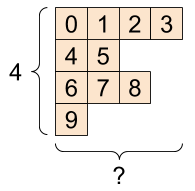


In [23]:
ragged_list = [
  [0, 1, 2, 3],
  [4, 5],
  [6, 7, 8],
  [9]]

In [25]:
try:
  tensor = tf.constant(ragged_list)
except Exception as e:
  print(f"{type(e).__name__}: {e}")

ValueError: Can't convert non-rectangular Python sequence to Tensor.


In [26]:
ragged_tensor = tf.ragged.constant(ragged_list)
print(ragged_tensor)

<tf.RaggedTensor [[0, 1, 2, 3], [4, 5], [6, 7, 8], [9]]>


tf.RaggedTensor 의 형상에는 알 수 없는 길이의 일부 축이 포함된다.

In [27]:
print(ragged_tensor.shape)

(4, None)


# 문자열 텐서(String tensors)

tf.string은 dtype이며,텐서에서 문자열(가변 길이의 바이트 배열)과 같은 데이터를 나타낼 수 있다.

문자열은 원자성이므로 Python 문자열과 같은 방식으로 인덱싱할 수 없다. 문자열의 길이는 텐서의 축 중의 하나가 아니다. 문자열을 조작하는 함수에 대해서는 tf.string 을 참조하기를..

다음은 스칼라 문자열 텐서이다.

In [28]:
# Tensors can be strings, too here is a scalar string.
scalar_string_tensor = tf.constant("Gray wolf")
print(scalar_string_tensor)

tf.Tensor(b'Gray wolf', shape=(), dtype=string)


문자열의 벡터,shape: [3,]


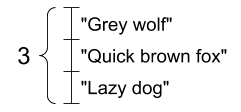

In [29]:
# If you have three string tensors of different lengths, this is OK.
tensor_of_strings = tf.constant(["Gray wolf",
                                 "Quick brown fox",
                                 "Lazy dog"])
# Note that the shape is (3,). The string length is not included.
print(tensor_of_strings)

tf.Tensor([b'Gray wolf' b'Quick brown fox' b'Lazy dog'], shape=(3,), dtype=string)


위의 출력에서 'b' 접두사는 tf.string dtype이 유니코드 문자열이 아니라 바이트 문자열임을 나타낸다. TensorFlow에서 유니코드 텍스트를 처리하는 자세한 내용은 [유니코드 튜토리얼](https://www.tensorflow.org/tutorials/load_data/unicode)을 참조하길

유니코드 문자를 전달하면 UTF-8로 인코딩된다는 것을 알 수 있다.

In [30]:
tf.constant("🥳👍")

<tf.Tensor: shape=(), dtype=string, numpy=b'\xf0\x9f\xa5\xb3\xf0\x9f\x91\x8d'>

문자열이 있는 일부 기본 함수는 tf.strings을 포함하여 tf.strings.split 에서 찾을 수 있다.

In [31]:
# We can use split to split a string into a set of tensors
print(tf.strings.split(scalar_string_tensor, sep=" "))

tf.Tensor([b'Gray' b'wolf'], shape=(2,), dtype=string)


In [32]:
# ...but it turns into a 'RaggedTensor' if you split up a tensor of strings,
# as each string might be split into a different number of parts.
print(tf.strings.split(tensor_of_strings))

<tf.RaggedTensor [[b'Gray', b'wolf'], [b'Quick', b'brown', b'fox'], [b'Lazy', b'dog']]>


```
Three strings split, shape: [3, None]
```


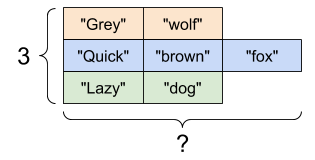


In [33]:
text = tf.constant("1 10 100")
print(tf.strings.to_number(tf.strings.split(text, " ")))

tf.Tensor([  1.  10. 100.], shape=(3,), dtype=float32)


tf.cast 를 사용하여 문자열 텐서를 숫자로 변환할 수는 없지만, 바이트로 변환한 다음 숫자로 변환할 수 있다.

In [36]:
byte_strings = tf.strings.bytes_split(tf.constant("Duck"))
byte_ints = tf.io.decode_raw(tf.constant("Duck"), tf.uint8)
print("Byte strings:", byte_strings)
print("Bytes: ", byte_ints)

Byte strings: tf.Tensor([b'D' b'u' b'c' b'k'], shape=(4,), dtype=string)
Bytes:  tf.Tensor([ 68 117  99 107], shape=(4,), dtype=uint8)


In [37]:
# Or split it up as unicode and then decode it
unicode_bytes = tf.constant("アヒル 🦆")
unicode_char_bytes = tf.strings.unicode_split(unicode_bytes, "UTF-8")
unicode_values = tf.strings.unicode_decode(unicode_bytes, "UTF-8")

print("\nUnicode bytes:", unicode_bytes)
print("\nUnicode chars:", unicode_char_bytes)
print("\nUnicode values:", unicode_values)


Unicode bytes: tf.Tensor(b'\xe3\x82\xa2\xe3\x83\x92\xe3\x83\xab \xf0\x9f\xa6\x86', shape=(), dtype=string)

Unicode chars: tf.Tensor([b'\xe3\x82\xa2' b'\xe3\x83\x92' b'\xe3\x83\xab' b' ' b'\xf0\x9f\xa6\x86'], shape=(5,), dtype=string)

Unicode values: tf.Tensor([ 12450  12498  12523     32 129414], shape=(5,), dtype=int32)


tf.string dtype은 TensorFlow의 모든 원시 바이트 데이터에 사용된다. tf.io 묘듈에는 이미지 디코딩 및 csv 구문 분석을 포함하여 데이터를 바이트로 변환하는 함수가 포함되어 있다.

# 희소 텐서(Sparse tensors)

때로는 매우 넓은 임베드 공간과 같이 데이터가 희소하다. TensorFlow는 tf.sparse.SparseTensor 및 관련 연산을 지원하여 희소 데이터를 효율적으로 저장한다.



```
A tf.SparseTensor, shape: [3, 4]
```

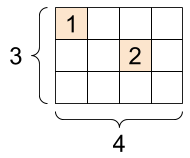



In [38]:
# Sparse tensors store values by index in a memory-efficient manner
sparse_tensor = tf.sparse.SparseTensor(indices=[[0, 0], [1, 2]],
                                       values=[1, 2],
                                       dense_shape=[3, 4])
print(sparse_tensor, "\n")

# You can convert sparse tensors to dense
print(tf.sparse.to_dense(sparse_tensor))

SparseTensor(indices=tf.Tensor(
[[0 0]
 [1 2]], shape=(2, 2), dtype=int64), values=tf.Tensor([1 2], shape=(2,), dtype=int32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64)) 

tf.Tensor(
[[1 0 0 0]
 [0 0 2 0]
 [0 0 0 0]], shape=(3, 4), dtype=int32)
